### df.loc[]: Busca pelo Nome (Rótulo).

### df.iloc[]: Busca pela Posição (Número).

### df[condicao]: Filtra linhas onde a condição é Verdadeira.

### .isin([lista]): O jeito limpo de filtrar muitas condições OU.

### .corr(): Descobre relações ocultas entre variáveis numéricas.

### .plot(): O jeito mais rápido de ver um gráfico até agora

In [ ]:
import pandas as pd

vendas = pd.read_csv('vendas_varejo.csv', parse_dates=['Data'])
vendas.set_index('Data', inplace=True)

In [183]:
vendas.set_index('Preco_Unitario')


,Cidade,Produto,Qtd_Venda,Desconto_Percentual,Total_Venda,Mes
Preco_Unitario,,,,,,
939.90,Curitiba,Tablet,7,0.05,6250.3350,January
2857.82,Porto Alegre,Tablet,9,0.05,24434.3610,January
2800.18,Belo Horizonte,Tablet,9,0.10,22681.4580,January
3857.13,Porto Alegre,Tablet,9,0.15,29507.0445,January
4201.52,Porto Alegre,Fone de Ouvido,2,0.00,8403.0400,January
...,...,...,...,...,...,...
3595.51,Rio de Janeiro,Notebook,4,0.00,14382.0400,September
2068.31,São Paulo,Fone de Ouvido,1,0.15,1758.0635,September
1298.60,São Paulo,Notebook,6,0.05,7402.0200,September


In [82]:
display(vendas.count())
display(vendas.head())

Cidade                 1000
Produto                1000
Qtd_Venda              1000
Preco_Unitario         1000
Desconto_Percentual    1000
Total_Venda            1000
Mes                    1000
dtype: int64

,Cidade,Produto,Qtd_Venda,Preco_Unitario,Desconto_Percentual,Total_Venda,Mes
Data,,,,,,,
2024-01-01,Curitiba,Tablet,7,939.90,0.05,6250.3350,January
2024-01-02,Porto Alegre,Tablet,9,2857.82,0.05,24434.3610,January
2024-01-03,Belo Horizonte,Tablet,9,2800.18,0.10,22681.4580,January
2024-01-04,Porto Alegre,Tablet,9,3857.13,0.15,29507.0445,January
2024-01-05,Porto Alegre,Fone de Ouvido,2,4201.52,0.00,8403.0400,January


In [86]:
vendas['Cidade'].unique()

array(['Curitiba', 'Porto Alegre', 'Belo Horizonte', 'Rio de Janeiro',
       'São Paulo'], dtype=object)

In [ ]:
vendas.sort_index(inplace=True)

In [ ]:
vendas.loc[['2025-12-01', '2025-12-16','2025-12-31'], ['Produto', 'Cidade', 'Total_Venda']] 

,Produto,Cidade,Total_Venda
Data,,,
2025-12-01,Tablet,Belo Horizonte,2114.400
2025-12-16,Smartphone,Curitiba,5926.761
2025-12-31,Tablet,Porto Alegre,17331.360


In [ ]:
vendas.loc['2025-06-10':'2025-12-08', ['Produto', 'Cidade', 'Total_Venda']]

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0] of type str

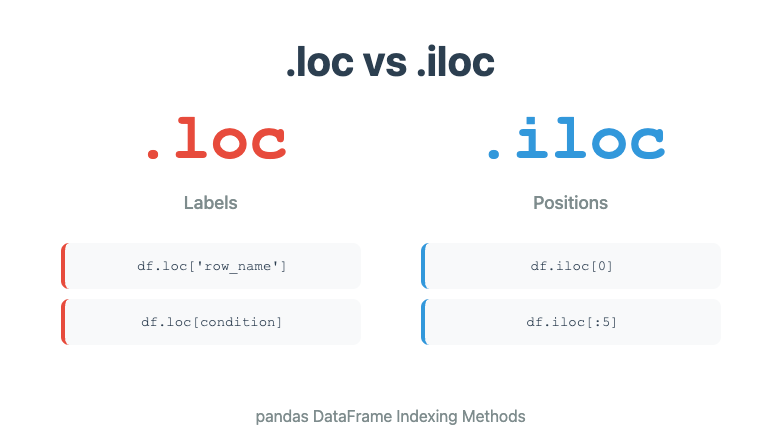

In [114]:
# 1. Usando .loc (Pelo Rótulo/Nome do Índice)
# Como nosso índice é Data, podemos fatiar por datas (slicing)
selecao_data = vendas.loc['2025-06-10':'2025-12-08', ['Produto', 'Cidade', 'Total_Venda']]

print("=== Vendas de 05 a 10 de Jan (.loc) ===")
display(selecao_data.head())

# 2. Usando .iloc (Pela Posição)
# "Quero as primeiras 5 linhas e as 3 primeiras colunas para uma checagem rápida"
selecao_posicao = vendas.iloc[230:235, 0:3]

print("\n=== Primeiras 5 linhas e 3 colunas (.iloc) ===")
display(selecao_posicao)

=== Vendas de 05 a 10 de Jan (.loc) ===


,Produto,Cidade,Total_Venda
Data,,,
2025-06-10,Smartphone,Porto Alegre,27098.7120
2025-06-11,Smartphone,São Paulo,3136.3895
2025-06-12,Smartphone,Porto Alegre,8259.1575
2025-06-13,Smartphone,Porto Alegre,13526.2140
2025-06-14,Fone de Ouvido,Rio de Janeiro,20914.5240



=== Primeiras 5 linhas e 3 colunas (.iloc) ===


,Cidade,Produto,Qtd_Venda
Data,,,
2024-08-18,Rio de Janeiro,Smartwatch,4
2024-08-19,São Paulo,Smartphone,6
2024-08-20,Curitiba,Notebook,5
2024-08-21,Curitiba,Smartphone,1
2024-08-22,São Paulo,Smartphone,9


In [118]:
vendas.columns

Index(['Cidade', 'Produto', 'Qtd_Venda', 'Preco_Unitario',
       'Desconto_Percentual', 'Total_Venda', 'Mes'],
      dtype='object')

In [ ]:
vendas.iloc[:, [0, 1, 2]].head()

,Cidade,Produto,Total_Venda
Data,,,
2024-01-01,Curitiba,Tablet,6250.3350
2024-01-02,Porto Alegre,Tablet,24434.3610
2024-01-03,Belo Horizonte,Tablet,22681.4580
2024-01-04,Porto Alegre,Tablet,29507.0445
2024-01-05,Porto Alegre,Fone de Ouvido,8403.0400


In [129]:
# Definindo o filtro (Regra de Negócio)
filiais_sul = ['Rio de Janeiro', 'Porto Alegre']
vendas[vendas['Cidade'].isin(filiais_sul)]

,Cidade,Produto,Qtd_Venda,Preco_Unitario,Desconto_Percentual,Total_Venda,Mes
Data,,,,,,,
2024-01-02,Porto Alegre,Tablet,9,2857.82,0.05,24434.3610,January
2024-01-04,Porto Alegre,Tablet,9,3857.13,0.15,29507.0445,January
2024-01-05,Porto Alegre,Fone de Ouvido,2,4201.52,0.00,8403.0400,January
2024-01-06,Rio de Janeiro,Fone de Ouvido,3,2314.12,0.10,6248.1240,January
2024-01-10,Porto Alegre,Smartphone,3,476.71,0.00,1430.1300,January
...,...,...,...,...,...,...,...
2026-09-16,Rio de Janeiro,Smartphone,7,4349.28,0.00,30444.9600,September
2026-09-17,Rio de Janeiro,Fone de Ouvido,6,3017.30,0.10,16293.4200,September
2026-09-20,Rio de Janeiro,Tablet,9,3832.30,0.10,31041.6300,September


In [130]:

# Definindo o filtro (Regra de Negócio)
filiais = ['Rio de Janeiro', 'Porto Alegre', 'nao existe']

# Aplicando o filtro com .isin
vendas_sul = vendas[vendas['Cidade'].isin(filiais)]

print(f"Total de vendas filtradas: {len(vendas_sul)}")
display(vendas_sul.head())

Total de vendas filtradas: 394


,Cidade,Produto,Qtd_Venda,Preco_Unitario,Desconto_Percentual,Total_Venda,Mes
Data,,,,,,,
2024-01-02,Porto Alegre,Tablet,9,2857.82,0.05,24434.3610,January
2024-01-04,Porto Alegre,Tablet,9,3857.13,0.15,29507.0445,January
2024-01-05,Porto Alegre,Fone de Ouvido,2,4201.52,0.00,8403.0400,January
2024-01-06,Rio de Janeiro,Fone de Ouvido,3,2314.12,0.10,6248.1240,January
2024-01-10,Porto Alegre,Smartphone,3,476.71,0.00,1430.1300,January


In [125]:
# Criando a "Máscara Booleana" (Verdadeiro/Falso)
regra_vip = (vendas['Total_Venda'] > 10000) & (vendas['Desconto_Percentual'] == 0.0)

# Aplicando a máscara
vendas_vip = vendas[regra_vip]

# Dica Visual: Use style para destacar o valor
vendas_vip.style.format({'Total_Venda': 'R$ {:,.2f}'}).background_gradient(subset=['Total_Venda'], cmap='Greens').background_gradient(subset=['Desconto_Percentual'], cmap='Reds')

,Cidade,Produto,Qtd_Venda,Preco_Unitario,Desconto_Percentual,Total_Venda,Mes
Data,,,,,,,
2024-01-15 00:00:00,Curitiba,Smartwatch,7,1866.930000,0.000000,"R$ 13,068.51",January
2024-01-19 00:00:00,São Paulo,Smartphone,6,3205.920000,0.000000,"R$ 19,235.52",January
2024-02-02 00:00:00,Curitiba,Notebook,4,4827.340000,0.000000,"R$ 19,309.36",February
2024-02-06 00:00:00,Belo Horizonte,Smartphone,5,4375.850000,0.000000,"R$ 21,879.25",February
2024-02-15 00:00:00,São Paulo,Smartwatch,6,2420.840000,0.000000,"R$ 14,525.04",February
2024-02-19 00:00:00,Curitiba,Notebook,6,3025.910000,0.000000,"R$ 18,155.46",February
2024-02-27 00:00:00,Rio de Janeiro,Tablet,4,2970.940000,0.000000,"R$ 11,883.76",February
2024-02-28 00:00:00,Curitiba,Smartphone,5,4354.770000,0.000000,"R$ 21,773.85",February
2024-03-26 00:00:00,São Paulo,Notebook,5,4061.300000,0.000000,"R$ 20,306.50",March


In [131]:
analise_correlacao = vendas[['Preco_Unitario', 'Qtd_Venda', 'Desconto_Percentual', 'Total_Venda']]
analise_correlacao.corr()


,Preco_Unitario,Qtd_Venda,Desconto_Percentual,Total_Venda
Preco_Unitario,1.000000,-0.008017,-0.000829,0.679623
Qtd_Venda,-0.008017,1.000000,0.000128,0.637823
Desconto_Percentual,-0.000829,0.000128,1.000000,-0.060246
Total_Venda,0.679623,0.637823,-0.060246,1.000000


In [ ]:
# Selecionando apenas as colunas numéricas de interesse


# Calculando a matriz de correlação
# 1.0 = Correlação perfeita positiva
# -1.0 = Correlação perfeita negativa
# 0.0 = Nenhuma relação
matriz_corr = analise_correlacao.corr()

print("=== Matriz de Correlação ===")
# O style aqui é essencial para adultos entenderem rápido (mapa de calor)
display(matriz_corr.style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}"))

=== Matriz de Correlação ===


,Preco_Unitario,Qtd_Venda,Desconto_Percentual,Total_Venda
Preco_Unitario,1.00,-0.01,-0.00,0.68
Qtd_Venda,-0.01,1.00,0.00,0.64
Desconto_Percentual,-0.00,0.00,1.00,-0.06
Total_Venda,0.68,0.64,-0.06,1.00


In [134]:
vendas['Total_Venda'].resample('ME').mean()

Data
2024-01-31    13102.718871
2024-02-29    13034.428690
2024-03-31    13626.468581
2024-04-30    10606.917633
2024-05-31    12098.227016
2024-06-30     9300.273417
2024-07-31    12356.622339
2024-08-31     8243.231339
2024-09-30    11925.632067
2024-10-31    12388.587210
2024-11-30    11550.794300
2024-12-31    12916.964758
2025-01-31    12001.817194
2025-02-28    11304.276589
2025-03-31    11546.184435
2025-04-30    10771.543883
2025-05-31    17540.008952
2025-06-30    14864.018417
2025-07-31    10752.373403
2025-08-31    13178.733903
2025-09-30    10812.985267
2025-10-31    12827.431629
2025-11-30    12282.548417
2025-12-31    11633.529935
2026-01-31    13368.948016
2026-02-28    10151.082839
2026-03-31    12797.340048
2026-04-30     9914.517483
2026-05-31    12645.780306
2026-06-30    10756.472667
2026-07-31    13377.688194
2026-08-31     9787.244581
2026-09-30    12463.376846
Freq: ME, Name: Total_Venda, dtype: float64

<Axes: title={'center': 'Tendência de media Faturamento Mensal'}, xlabel='Data', ylabel='Faturamento (R$)'>

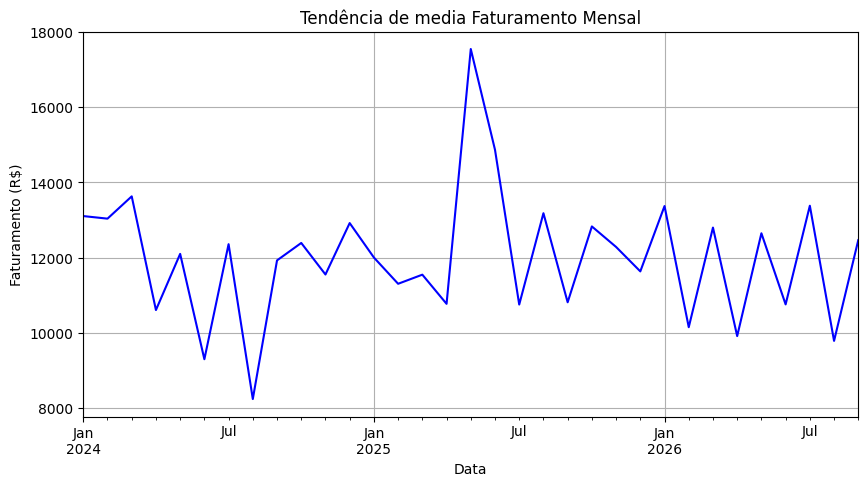

In [138]:
# 1. Primeiro preparamos os dados (Agrupamento por Mês)
# Resample 'M' agrupa pela média/soma mensal quando o índice é data
vendas_mensais = vendas['Total_Venda'].resample('ME').mean()

# 2. Plotagem direta
# O Pandas usa o matplotlib nos bastidores, mas a sintaxe é pura Orientação a Objeto do Pandas
grafico = vendas_mensais.plot(
    kind='line',
    title='Tendência de media Faturamento Mensal',
    figsize=(10, 5),
    grid=True,
    color='blue',
    ylabel='Faturamento (R$)'
)

# Adicionando rótulo Y (opcional, mas bom costume)
# grafico.set_ylabel("Faturamento (R$)");
display(grafico)

## Correlação em Pandas e tipos

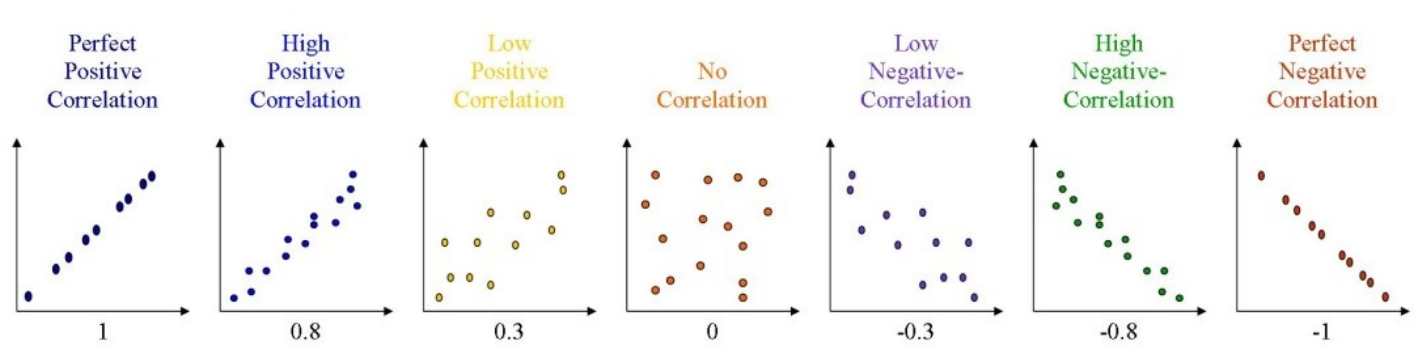

In [ ]:
import numpy as np
# Configuração
np.random.seed(78)
n_dias = 200

# 1. Criando variáveis INDEPENDENTES (Causas)
# Temperatura: varia entre 15°C e 40°C
temperatura = np.random.uniform(15, 40, n_dias)

# Preço do Sorvete: varia entre R$ 5,00 e R$ 12,00
preco = np.random.uniform(5, 12, n_dias)

# Investimento em Marketing (Ads): varia entre R$ 0 e R$ 100/dia
marketing = np.random.uniform(0, 100, n_dias)

# Chuva (mm): A maioria dos dias é 0, alguns chovem muito
chuva = np.random.exponential(scale=5, size=n_dias) # Distribuição exponencial para simular chuva

# ID aleatório (para provar que não tem correlação)
id_transacao = np.random.randint(1000, 9000, n_dias)

# 2. Criando a variável DEPENDENTE (Consequência: Vendas)
# Fórmula Mágica: Vendas Base + Efeito Temp + Efeito Mkt - Efeito Preço - Efeito Chuva + Acaso
numero_vendas_correlacionado = (
    100 +                       # Base fixa
    (temperatura * 5) +         # + Calor = + Vendas (Correlação Positiva Forte)
    (marketing * 2) -           # + Marketing = + Vendas (Correlação Positiva Média)
    (preco * 15) -              # + Preço = - Vendas (Correlação Negativa)
    (chuva * 3) +               # + Chuva = - Vendas (Correlação Negativa)
    np.random.normal(0, 2, n_dias) # "Ruído" (coisas que não explicamos)
)

# Montando o DataFrame
vendas_unidade = pd.DataFrame({
    'Vendas (Alvo)': numero_vendas_correlacionado.astype(int),
    'Temperatura (C)': temperatura.round(1),
    'Marketing (R$)': marketing.round(2),
    'Preco Unitario (R$)': preco.round(2),
    'Chuva (mm)': chuva.round(1),
    'ID_Aleatorio': id_transacao
})

display(vendas_unidade.head())
vendas_unidade.to_csv('vendas_correlation.csv', index=False)

,Vendas (Alvo),Temperatura (C),Marketing (R$),Preco Unitario (R$),Chuva (mm),ID_Aleatorio
0,93,24.4,10.31,9.49,0.9,6959
1,389,38.8,90.26,5.59,1.6,1126
2,270,33.3,50.53,6.13,1.0,4177
3,242,30.0,82.65,11.29,0.5,4056
4,120,18.9,32.00,9.25,0.6,1603


In [159]:
vendas_unidade.corr()['Vendas (Alvo)']

Vendas (Alvo)          1.000000
Temperatura (C)        0.437119
Marketing (R$)         0.768241
Preco Unitario (R$)   -0.508921
Chuva (mm)            -0.191877
ID_Aleatorio           0.030587
Name: Vendas (Alvo), dtype: float64

<Axes: title={'center': 'Correlação das Variáveis com Vendas'}>

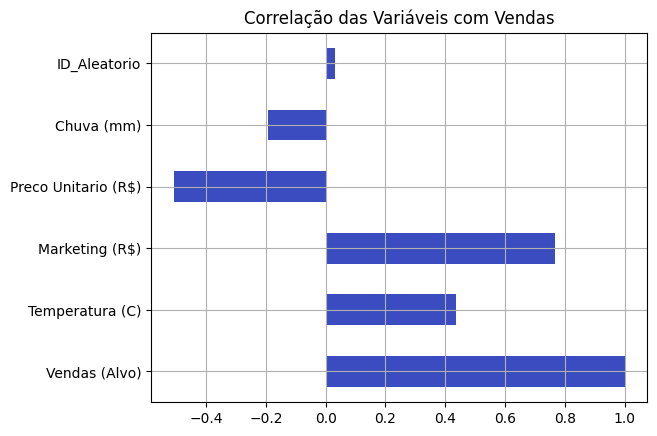

In [173]:
correlacao = vendas_unidade.corr()['Vendas (Alvo)']
correlacao.plot(kind='barh', title='Correlação das Variáveis com Vendas', grid=True, cmap='coolwarm')

In [162]:
# Focando a correlação apenas na coluna de Vendas e ordenando
correlacao = vendas_unidade.corr()['Vendas (Alvo)'].sort_values(ascending=False)

print("=== Grau de Influência nas Vendas ===")
# O style bar ajuda MUITO a visualizar positivos vs negativos
pd.DataFrame(correlacao).style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

=== Grau de Influência nas Vendas ===


,Vendas (Alvo)
Vendas (Alvo),1.000000
Marketing (R$),0.768241
Temperatura (C),0.437119
ID_Aleatorio,0.030587
Chuva (mm),-0.191877
Preco Unitario (R$),-0.508921


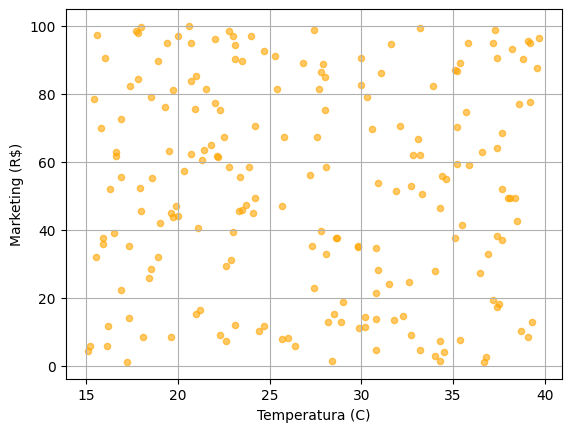

In [172]:
# Exemplo 1: Correlação POSITIVA (Temperatura)
vendas_unidade.plot.scatter(
    x='Temperatura (C)', 
    y='Marketing (R$)', 
    title='',
    grid=True,
    color='orange',
    alpha=0.6 # Transparência ajuda se tiver muitos pontos juntos
);